<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

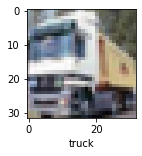

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.8190 - accuracy: 0.3473
Epoch 2/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6245 - accuracy: 0.4231
Epoch 3/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.5368 - accuracy: 0.4528
Epoch 4/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4735 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4164 - accuracy: 0.4973


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.32      0.44      1000
           1       0.63      0.60      0.61      1000
           2       0.40      0.33      0.36      1000
           3       0.35      0.30      0.32      1000
           4       0.28      0.57      0.38      1000
           5       0.45      0.31      0.36      1000
           6       0.44      0.65      0.53      1000
           7       0.74      0.33      0.46      1000
           8       0.48      0.74      0.58      1000
           9       0.62      0.44      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4782 - accuracy: 0.4645
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1365 - accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0099 - accuracy: 0.6473
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9327 - accuracy: 0.6747
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8670 - accuracy: 0.6983
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8170 - accuracy: 0.7175
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7709 - accuracy: 0.7319
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7310 - accuracy: 0.7447
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6931 - accuracy: 0.7584
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9447 - accuracy: 0.6895


[0.9447306394577026, 0.6894999742507935]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.09165313e-03, 8.14527666e-05, 1.36274705e-02, 7.80415654e-01,
        6.19758386e-04, 1.85230672e-01, 3.08450405e-03, 8.04594038e-06,
        1.56975128e-02, 1.43342040e-04],
       [2.82465899e-05, 1.65511578e-04, 8.49095169e-11, 1.10305610e-11,
        8.55074733e-10, 4.84903747e-15, 7.55577567e-13, 1.59367636e-13,
        9.99804556e-01, 1.66813663e-06],
       [2.14985702e-02, 1.97566763e-01, 1.50916298e-04, 4.58992930e-04,
        1.56319966e-05, 1.51945042e-05, 3.35187469e-05, 1.07754269e-04,
        7.52764940e-01, 2.73877010e-02],
       [9.80395496e-01, 1.71502749e-03, 2.70251022e-03, 1.93500047e-04,
        9.12949181e-05, 1.53418587e-05, 5.81812765e-06, 1.47098372e-05,
        1.31030791e-02, 1.76336162e-03],
       [2.92114407e-07, 1.62485721e-05, 1.49803329e-02, 7.77644664e-03,
        8.69652569e-01, 1.90080580e-04, 1.07371420e-01, 1.24888254e-06,
        1.11912223e-05, 1.04643959e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

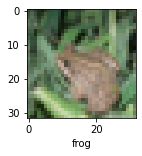

In [ ]:
plot_sample(X_test, y_test,4)

In [ ]:
classes[y_classes[4]]

'deer'